In [1]:
!pip install gdown


import gdown

# Import the file from Google Drive using its unique identifier
file_id = '183-vEE-6K08JVeFlHsOnP3kwIeDHGU4U'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'train.zip'
gdown.download(url, output, quiet=False)



import gdown

# Import the file from Google Drive using its unique identifier
file_id = '1Hplha9HWYt-XtWn2Bw2mqOelKnmvEQaU'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'test.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=183-vEE-6K08JVeFlHsOnP3kwIeDHGU4U
From (redirected): https://drive.google.com/uc?id=183-vEE-6K08JVeFlHsOnP3kwIeDHGU4U&confirm=t&uuid=ecf9aef9-2893-447f-a0f5-9fb1d64a3fa6
To: /kaggle/working/train.zip
100%|██████████| 957M/957M [00:04<00:00, 209MB/s] 
Downloading...
From (uriginal): https://drive.google.com/uc?id=1Hplha9HWYt-XtWn2Bw2mqOelKnmvEQaU
From (redirected): https://drive.google.com/uc?id=1Hplha9HWYt-XtWn2Bw2mqOelKnmvEQaU&confirm=t&uuid=6fd76117-7721-407a-adfb-09becbe3fd8e
To: /kaggle/working/test.zip
100%|██████████| 642M/642M [00:02<00:00, 234MB/s] 


'test.zip'

In [2]:
import numpy as np # linear algebra
import pandas as pd 

In [3]:
!unzip "/kaggle/working/train.zip"
!unzip "/kaggle/working/test.zip"

Archive:  /kaggle/working/train.zip
   creating: train/
   creating: train/images/
  inflating: train/images/5576.jpg   
  inflating: train/images/1730.jpg   
  inflating: train/images/3816.jpg   
  inflating: train/images/6843.jpg   
  inflating: train/images/424.jpg    
  inflating: train/images/6998.jpg   
  inflating: train/images/448.jpg    
  inflating: train/images/2772.jpg   
  inflating: train/images/1452.jpg   
  inflating: train/images/4468.jpg   
  inflating: train/images/4108.jpg   
  inflating: train/images/5015.jpg   
  inflating: train/images/5589.jpg   
  inflating: train/images/5330.jpg   
  inflating: train/images/1263.jpg   
  inflating: train/images/5206.jpg   
  inflating: train/images/2453.jpg   
  inflating: train/images/2142.jpg   
  inflating: train/images/1398.jpg   
  inflating: train/images/3113.jpg   
  inflating: train/images/981.jpg    
  inflating: train/images/7111.jpg   
  inflating: train/images/5462.jpg   
  inflating: train/images/6727.jpg   
  inf

In [4]:
from fastai.vision.all import *
set_seed(42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
trn_path = '/kaggle/working/train/images/'
files    = get_image_files(trn_path)
files

(#7200) [Path('/kaggle/working/train/images/567.jpg'),Path('/kaggle/working/train/images/2862.jpg'),Path('/kaggle/working/train/images/1298.jpg'),Path('/kaggle/working/train/images/1070.jpg'),Path('/kaggle/working/train/images/4022.jpg'),Path('/kaggle/working/train/images/2298.jpg'),Path('/kaggle/working/train/images/211.jpg'),Path('/kaggle/working/train/images/236.jpg'),Path('/kaggle/working/train/images/1569.jpg'),Path('/kaggle/working/train/images/3262.jpg')...]

(1441, 1080)


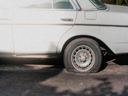

In [6]:
img = PILImage.create(files[0])
print(img.size)
img.to_thumb(128)

In [7]:
Train            = pd.read_csv('/kaggle/working/train/train.csv')
Test             = pd.read_csv('/kaggle/working/test/test.csv')
damage = Train.label.unique()
Train.head()


,image_id,filename,label
0,1,1.jpg,2
1,2,2.jpg,4
2,3,3.jpg,2
3,4,4.jpg,3
4,5,5.jpg,5


In [18]:
def train(arch,item,batch,epochs=4):   
    dblock = DataBlock(blocks = (ImageBlock, CategoryBlock(vocab=damage)),
                       get_x = ColReader('filename', pref = '/kaggle/working/train/images/'),
                       get_y = ColReader('label'),
                       splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
                       item_tfms = item, #Resize(320, method = 'squish'),
                       batch_tfms = batch #aug_transforms(size = 128, min_scale = 0.75)
                      )

    dls = dblock.dataloaders(Train)
    #dls.show_batch(max_n = 6)
    learn = vision_learner(dls, arch, loss_func = nn.CrossEntropyLoss(), metrics=accuracy).to_fp16()
    learn.fine_tune(epochs,  0.01)
    return learn

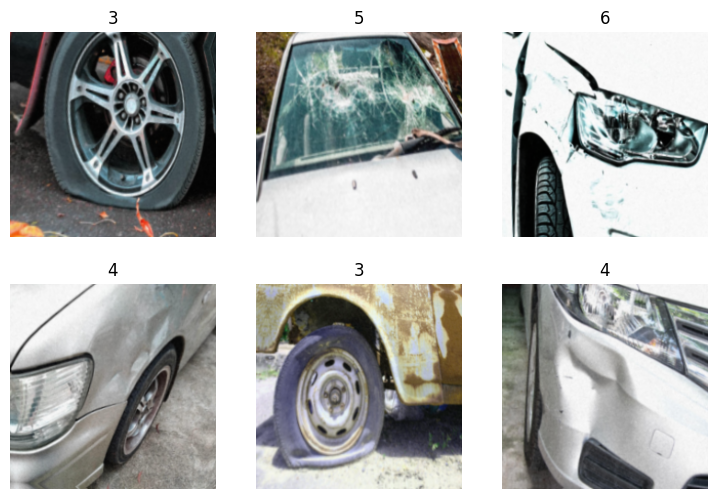

In [23]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock(vocab=damage)),
                   get_x = ColReader('filename', pref = '/kaggle/working/train/images/'),
                   get_y = ColReader('label'),
                   splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
                   item_tfms = Resize(224, method = 'squish'),
                   batch_tfms = aug_transforms(size = 224, min_scale = 0.75)
                  )

dls = dblock.dataloaders(Train)
dls.show_batch(max_n = 6)

In [55]:
learn = train('resnet26d',Resize(256, method = 'squish'),aug_transforms(size = 224, min_scale = 0.75),epochs=9)

epoch,train_loss,valid_loss,accuracy,time
0,1.105674,0.747760,0.728472,00:55


epoch,train_loss,valid_loss,accuracy,time
0,0.606561,0.498291,0.807639,00:55
1,0.500914,0.423640,0.834722,00:55
2,0.397120,0.339546,0.885417,00:53
3,0.266224,0.282822,0.915278,00:54
4,0.179398,0.246414,0.928472,00:53
5,0.137946,0.186224,0.942361,00:54
6,0.097092,0.180493,0.952083,00:53
7,0.063480,0.149991,0.955556,00:54
8,0.054852,0.141978,0.954861,00:54


In [46]:
learn = train('vit_small_patch16_224',Resize(256, method = 'squish'),aug_transforms(size = 224, min_scale = 0.75),epochs=10)

epoch,train_loss,valid_loss,accuracy,time
0,1.115739,0.773435,0.745833,00:54


epoch,train_loss,valid_loss,accuracy,time
0,0.566731,0.364675,0.870139,00:55
1,0.409198,0.290999,0.888194,00:55
2,0.310514,0.276618,0.906250,00:54
3,0.241303,0.203850,0.931250,00:55
4,0.155774,0.150162,0.955556,00:55
5,0.107599,0.130757,0.966667,00:55
6,0.057572,0.127484,0.971528,00:54
7,0.033989,0.097202,0.976389,00:55
8,0.022045,0.094814,0.977083,00:55
9,0.018404,0.093604,0.978472,00:55


In [36]:
learn = train('vit_small_patch16_224',Resize(256, method = 'squish'),aug_transforms(size = 224, min_scale = 0.75),epochs=9)

epoch,train_loss,valid_loss,accuracy,time
0,1.133847,0.663396,0.762500,00:53


epoch,train_loss,valid_loss,accuracy,time
0,0.561156,0.365808,0.868750,00:53
1,0.409256,0.277202,0.900000,00:54
2,0.308244,0.345582,0.886806,00:54
3,0.217763,0.264532,0.911806,00:56
4,0.130815,0.203622,0.945139,00:55
5,0.092782,0.090273,0.978472,00:55
6,0.053457,0.078367,0.977083,00:55
7,0.029382,0.068238,0.982639,00:54
8,0.021033,0.068645,0.983333,00:55


In [25]:
learn = train('convnext_small_in22k',Resize(224),aug_transforms(size = 224, min_scale = 0.75),epochs=9)

/opt/conda/lib/python3.10/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name convnext_small_in22k to current convnext_small.fb_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,accuracy,time
0,1.144459,0.740885,0.740972,00:51


epoch,train_loss,valid_loss,accuracy,time
0,0.588557,0.409330,0.844444,01:01
1,0.450683,0.349991,0.879167,01:02
2,0.356435,0.316863,0.900694,01:02
3,0.228322,0.240595,0.927778,01:03
4,0.146567,0.175216,0.953472,01:03
5,0.086568,0.113088,0.961806,01:03
6,0.052241,0.122185,0.971528,01:03
7,0.041964,0.095557,0.977778,01:03
8,0.035939,0.099043,0.975694,01:03


In [9]:
learn = train('convnext_small_in22k',Resize(256),aug_transforms(size = 224, min_scale = 0.75),epochs=9)

/opt/conda/lib/python3.10/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name convnext_small_in22k to current convnext_small.fb_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,accuracy,time
0,1.113877,0.635188,0.764583,00:54


epoch,train_loss,valid_loss,accuracy,time
0,0.573362,0.398035,0.843056,01:02
1,0.421496,0.298092,0.890278,01:03
2,0.304134,0.211863,0.934028,01:04
3,0.220738,0.163965,0.940278,01:04
4,0.140829,0.139099,0.957639,01:04
5,0.078792,0.124108,0.965972,01:04
6,0.050007,0.125674,0.974306,01:04
7,0.037547,0.107977,0.979167,01:04
8,0.027156,0.103677,0.979167,01:08


In [19]:
learn.save('convnext_small_in22k_256')

Path('models/convnext_small_in22k_256.pth')

In [ ]:
learn = train('convnext_small_in22k',Resize(480),aug_transforms(size = 320, min_scale = 0.75),epochs=10)

In [47]:
test_dl = learn.dls.test_dl('/kaggle/working/test/images/' + Test['filename'])
preds , _ = learn.get_preds(dl=test_dl)

In [48]:
preds = F.softmax(preds, dim=1)
preds

tensor([[1.4467e-06, 7.3347e-04, 3.0922e-07, 1.9397e-04, 3.2396e-09, 9.9907e-01],
        [5.1677e-04, 8.0861e-01, 9.2652e-05, 1.8761e-01, 1.8459e-05, 3.1533e-03],
        [9.8346e-08, 9.9999e-01, 1.1001e-05, 3.6114e-07, 8.5252e-10, 4.0757e-08],
        ...,
        [1.4689e-07, 9.2560e-01, 3.1720e-05, 7.4218e-02, 7.1741e-07, 1.4440e-04],
        [3.0462e-09, 1.0000e+00, 9.6430e-09, 6.9592e-09, 2.1601e-09, 1.2262e-08],
        [2.4165e-01, 2.5926e-01, 7.9611e-02, 4.0628e-01, 2.9184e-06, 1.3201e-02]])

In [49]:
submission_sf = pd.DataFrame({

    'image_id': Test['image_id'],
    '1': preds[:, 0].squeeze().numpy(),
    '2' : preds[:, 1].squeeze().numpy(),
    '3': preds[:, 2].squeeze().numpy(),
    '4': preds[:, 3].squeeze().numpy(),
    '5': preds[:, 4].squeeze().numpy(),
    '6': preds[:, 5].squeeze().numpy()

})

In [50]:
submission_sf

,image_id,1,2,3,4,5,6
0,7201,1.446676e-06,7.334680e-04,3.092206e-07,1.939705e-04,3.239637e-09,9.990708e-01
1,7202,5.167708e-04,8.086070e-01,9.265191e-05,1.876119e-01,1.845930e-05,3.153264e-03
2,7203,9.834569e-08,9.999886e-01,1.100136e-05,3.611416e-07,8.525204e-10,4.075707e-08
3,7204,2.080703e-12,8.144722e-15,1.322414e-12,2.120849e-14,1.000000e+00,6.495478e-13
4,7205,1.574180e-09,1.124802e-07,3.516952e-08,9.999999e-01,6.046246e-09,1.928726e-09
...,...,...,...,...,...,...,...
4795,11996,9.416273e-07,9.993439e-01,1.546659e-05,3.708985e-04,8.690339e-08,2.686525e-04
4796,11997,2.303429e-04,1.810289e-02,8.409154e-04,9.759159e-01,7.626772e-04,4.147223e-03
4797,11998,1.468935e-07,9.256048e-01,3.172017e-05,7.421823e-02,7.174085e-07,1.443986e-04
4798,11999,3.046188e-09,1.000000e+00,9.643022e-09,6.959187e-09,2.160070e-09,1.226156e-08


In [51]:
submission_sf.to_csv('vit_small_patch16_224_prob_10.csv',index=False)

In [52]:
predicted_labels_batch = torch.argmax(preds, dim=1).tolist()

In [ ]:
predicted_labels_batch

In [ ]:
#label_map = {i: label for i, label in enumerate(dls.vocab)}
#actual_labels = [label_map[label] for label in predicted_labels_batch ]

#print(actual_labels)

In [53]:
ss = pd.read_csv('/kaggle/input/submission/sample_submission-3.csv')
ss['label'] = predicted_labels_batch
ss['label'] = ss['label'] +1
ss['label'].value_counts()

label
2    1620
4    1452
5     795
6     533
3     331
1      69
Name: count, dtype: int64

In [43]:
ss = pd.read_csv('/kaggle/input/submission/sample_submission-3.csv')
ss['label'] = predicted_labels_batch
ss['label'] = ss['label'] +1
ss['label'].value_counts()

label
2    1571
4    1436
5     789
6     595
3     332
1      77
Name: count, dtype: int64

In [15]:
ss = pd.read_csv('/kaggle/input/submission/sample_submission-3.csv')
ss['label'] = predicted_labels_batch
ss['label'] = ss['label'] +1
ss['label'].value_counts()

label
2    1585
4    1448
5     794
6     559
3     345
1      69
Name: count, dtype: int64

In [ ]:
ss = pd.read_csv('/kaggle/input/submission/sample_submission-3.csv')
ss['label'] = predicted_labels_batch
ss['label'] = ss['label'] +1
ss['label'].value_counts()

In [ ]:
ss.label.value_counts()

In [54]:
#ss.to_csv('vit_small_patch16_224_10.csv',index=False)

In [ ]:
from IPython.display import FileLink
FileLink(r'')

In [20]:
#interp = ClassificationInterpretation.from_learner(learn)
#

In [24]:
#interp.plot_confusion_matrix()

AssertionError: ==:
8640
1440

In [ ]:
#interp.plot_top_losses(8, nrows=1)